# Neural Network for Digit Classification

Author: Emily Cheng-hsin Wuu

**Maximum possible score = 100 points**

### Assignment Overview
Deep learning has quickly become one of the more popular applied machine learning techniques in
computer vision. Convolutional neural networks have been applied to many different computer vision problems such as image classification, recognition, and segmentation with great success. 

In this assignment, you will first implement a fully-connected feed-forward neural network for hand-written digit classification, which involves going into the details of network parameter initialization, activation functions, loss functions and gradient computation. You will go through the forward pass and the backward propagation demistify neural networks. Next, you  will move your work to PyTorch, where you can learn to use a modern deep learning framework to classify digits. 

### Learning Objectives 
* Describe the structure and function of neural networks and use a deep neural network to classify hand-written digits.

### Source

This assignment was derived, in part, from assignments used in conjunction with computer vision courses at Carnegie Mellon University: 

* 16-385 Computer Vision: Digit Recognition with Convolutional Neural Networks
    * Authors: *Abhinav Garlapati and Prakruti Gogia*
* 16-720A Computer Vision: Optical Character Recognition using Neural Networks
    * Authors: *Chen-Hsuan Lin, Brian Okorn, Yifan Xing, Sree Harsha Kalli, Siddarth Malreddy, Prakhar Pradeep Naval, Khushi Gupta, Shangxuan Wu, Bala Siva Jujjavarapu, Jingyan Wang, Yashasvi Agrawal*
* 16720-A S18 OCR using Neural Networks
    * Authors: *Leonid Keselman, Mohit Sharma, Arjun Sharma, Rawal Khirodkar, Aashi Manglik, Tanya Marwah*
* 16720-A F18 Neural Networks for Recognition
    * Authors: *Leonid Keselman, Tanya Marwah, Shashank Tripathi, Vibha Nasery, Jiayuan Li*
* 16720-B F18 Neural Networks for Recognition
    * Authors: *Gaurav Mittal, Akshita Mittel, Sowmya Munukutla, Nathaniel Chodosh, Ming-Fang Chang, Chengqian Che*

# Table of Contents 

#### [Part I: Implement a Fully-connected Neural Network [100 pts]](#part-1)
- [Item 1 [0 pts]: Network Initialization (Xavier)](#q1)
- [Item 2 [10 pts]: Sigmoid Activation Function](#q2)
- [Item 3 [15 pts]: Softmax Function](#q3)
- [Item 4 [15 pts]: Loss Function (Cross-Entropy)](#q4)
- [Item 5 [20 pts]: Forward Pass](#q5)
- [Item 6 [20 pts]: Gradient Computation](#q6)
- [Item 7 [0 pts]: Backward Propagation](#q7)
- [Item 8 [20 pts]: Train Models with NIST36](#q8)

#### [Part 2: PyTorch for Digit Classification [0 pts]](#part-2)
- [Item 9 [0 pts]: PyTorch Installation](#q9)
- [Item 10 [0 pts]: Train Models with NIST36 (PyTorch)](#q10)

In [1]:
#import Python libraries for this assignment
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

<a name="part-1"></a>
# Part I: Implement a Fully-connected Neural Network [ 45 pts]
We will give a brief overview of the math for a feed forward network with a single hidden layer. There are two parts:  (1) forward propagation where the network learns from the input data; (2) backward propagation where the network updates its parameters based on the loss function. This will help you to understand the implementation of different functions required for building a simple two-layer neural network at the end of this section. 

## Forward propagation
To do classifcation with a fully-connected network $f$, you need to apply a series of linear and non-linear
functions to an input vector $x$ of size $N \times 1$ to generate an output vector $f(x)$ of size
$C \times 1 $, where each element of the output vector represents the probability of input vector $x$ belonging to certain class in the dataset. The input layer has $N$ input units as the dimension of the data samples is $N$. In between the input and output layers, we need to compute the values of each units from all of the hidden layers. For any unit $x$ from the <i><b>pre-activated</b></i> hidden layers, we can write it as 

 <center>$a^{(1)}(x) = W^{(1)}x + b^{(1)}$</center>
 
Next, it will go through an activation function $g$, and the <i><b>post-activated</b></i>values of the hidden layer $h^{(1)}(x)$ will be:

<center>$h^{(1)}(x)= g(a^{(1)}(x)) = g(W^{(1)}x + b^{(1)})$ </center>

Following this pattern, we can write any hidden layer ($1 < t \leq T $) pre- and post- activations by:

 <center>$a^{(t)}(x) = W^{(t)}h^{(t-1)} + b^{(t)}$ </center>
 
 <center>$h^{(t)}(x) = g(a^{(t)}(x))$ </center>
 
Finally, the  <i><b>post-activation</b></i> values of the output layer are computed with:

<center>$f^{(x)} = o(a^{(T)}(x)) = o(W^{(T)}h^{(T - 1)}(x) + b^{(T)})$</center>

where $o$ is the output activation function. For most of the case activation function $g$ and $o$ will be different. For
this assignment, you will be using the <i><b>sigmoid activation function</b></i>  for the hidden layer (activation function $g$):
<center>$g(y) = \frac{1}{1 + exp(y)}$</center>

where when $g$ is applied to a vector, it is applied element wise across the vector.


Since you are working on classification tasks, you will use <i><b>softmax function</b></i> as the output activation function ($o$) to turn the real value, possibly negative
values of $a^{(T)}(x)$ into a set of probabilities (vector of positive numbers that sum to 1) that represents the possibility of each element belonging to certain class in the dataset. Letting
$x_{i}$ denote the $i$th element of the vector $x$, the softmax function is defined as:
<center>$o_{i}(y) = \frac{exp(y_{i})}{\sum_{j}{exp(y_{j})}} $</center>


After your network outputs the predicting probabilities of each class, you arrive at your final destination of the forward propagation: computing the loss function. Here, the loss function is used to compute the difference between the ground truth (true value), and the prediction from the network. A properly-functioning network should have the prediction as close to the ground truth as possible, meaning that the difference of these two terms should be somewhere close to zero. For this programming assignment, you will use <i><b>cross-entropy loss</b></i>, which is generally used for classification tasks: 
<center>$L_{f}(D) = -\sum_{(x, y)\in D}{y \cdot log(f{x})}$</center>

In the later sections, you will see more details about the intuitive explanations for these different functions.

## Backward propagation
After each forward propagation, you need a method to update the network parameters based on the loss function. Here, gradient descent is an iterative optimization algorithm, used to find the local optima. To
find the local optima, we randomly select a point on the function and move in the direction of
negative gradient until some stopping criteria are met (eg. loss doesn't change for a long time). To compute the gradient, you need to compute the derivative of the loss function over the network parameters (weights and biases). Mathmatically, the update equation for a general weight $W_{ij}^{t}$ abd bias $b_{i}^{t}$ is:
<center>$W_{ij}^{t)} = W_{ij}^{t-1} - 	\alpha * \frac{\sigma L_{f}}{\sigma W_{ij}^{t-1}}$</center>
<center>$b_{i}^{t} = b_{i}^{t-1} - 	\alpha * \frac{\sigma L_{f}}{\sigma b_{i}^{t-1}}$</center>

where $\alpha$ is the learning rate. 

## Let's Get Started! 
After knowing the math behind building the neural network, you will now start to put everything together, which includes initialization, the activation function, the loss function for forward pass, and gradient descent for backward propagation. At the end of Part 1, you will build a simple two-layer neural network from scratch and train your network to do digit classification.

<a name="q1"></a>
## Network Initialization [ 0 pts]

Initialization of network weights is one of the more important techniques for training network successfully. You might think about why you couldn't just directly initalize the weights with all zeros. The reason is because initializing all the parameters (weights and biases) in the network to zero will result in the output of every neuron
become zero during the forward propagation, meaning that when you do the back
propagation, you will get same gradient for all the parameters as you feed them with the
same input. Hence, it is impossible for us to update our parameters and get closer and closer to the optimal solution.

To properly handle initialization, you will use <a href="http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf">Xavier initialization</a> - formula (16), where $Var[weight] = \frac{2}{(n_{in} + n_{out})}$, where $n_{in}$ is the dimensionality of the input layer and $n_{out}$ is the dimensionality of the output layer. You will use a uniform distribution $weight \sim U[-\frac{\sqrt 6}{\sqrt (n_{in} + n_{out})}, \frac{\sqrt 6}{\sqrt (n_{in} + n_{out})}]$to sample random numbers. The function is provided as follows. 

In [2]:
def initialize_weights(n_in, n_out, params, name=''):
    """
    Xavier weight initialization
    
    :param n_in: input vector [dimension of input layer]
    :param n_in: output vector [dimension of output layer]
    :param params: a dictionary containing parameters
    :param name: name of the layer
    :return: None
    """
    b = np.zeros(n_out)
    n = n_in + n_out
    l, u = -np.sqrt(6/n), np.sqrt(6/n)
    W = np.random.uniform(l, u, (n_in, n_out))
    
    ## store parameters of the network
    params['W' + name] = W
    params['b' + name] = b

<a name="q2"></a>
## Sigmoid Activation Function [ 10 pts]
Now, you will move on implementing the forward propagation for your neural network, where you need to implement activation funtions. Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated or not, based on whether each neuron’s output is relevant for the model’s prediction. 

You want to implement the sigmoid activation function, along with forward propagation for a single layer with an activation function, namely $y = \sigma (XW + b)$, returning the output and intermediate results for an $N \times D$ dimension input $X$, with examples ($N$ dimension) along the rows, data dimensions ($D$ dimension) along the columns. For example, if our $X$ consists of 10 points under 2d coordinate representing by $(x, y)$, then $X$ will have dimension as 10 x 2 ($N=10, D=2$) 
If you visualize the sigmoid activation function, it will look like the figure below. Notice the range of the output is clamped between zero and one. 

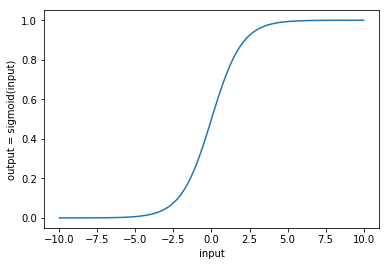

In [3]:
#example of the sigmoid activation function appearance
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
  
plt.plot(x, y)
plt.xlabel("input")
plt.ylabel("output = sigmoid(input)")
  
plt.show()

Follow the math formula of sigmoid activation: 
<center>$\sigma (x) = \frac{1}{1 + exp(x)}$</center>

to implement the following function with NumPy. You can call $np.exp(x)$ to express exponential function of $x$. 

In [4]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE
import numpy as np
def sigmoid(x):
    """
    Sigmoid activation function


    :param x: input 2d vectors (N x D), where N refers to number of data, 
        and D refers to number of dimension of each input data.
    :return: sigmoid activation function.
    """
    sigmoid = 1/(1+ np.exp(-x)) #to be implemented
    return sigmoid

# YOUR CODE HERE
# raise NotImplementedError()

<a name="q3"></a>
## Softmax Function [ 15 pts]
Since we are using neural networks for classification, a common output activation function
to use for the last layer is the softmax function. This will allow us to turn the real value, possibly negative
values into a set of probabilities (vector of positive numbers that sum to 1). Implement the softmax function, which is defined as below for each index $i$ in a vector $x$:
<center>$\text{softmax}(x_{i}) = \frac{exp(x_{i})}{\sum_{j}{exp(x_{j})}} $</center>


Here, we usually add an offset $c = -max (x_{i})$ to the input $x_i$ to make sure the output of the numerator is within the range $(0, 1]$. If we don't apply any offset $c$, meaning that $c=0$ in this formula, then the output range of the numerator will be $(0, infinite]$, which might cause an overflow calculation. This trick utilizes the fact that softmax function is invariant to translation, that is:
<center>$\text{softmax}(x) = \text{softmax}(x + c), \forall c \in \mathbb{R} $</center>

In [5]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE
def softmax(x):
    """
    Softmax activation function

    :param x: input 2d vectors (N x C), where N refers to number of data, 
        and C refers to number of possible classes in the dataset.
    :return: softmax activation function
    """
    # remember to apply trick
    offset_c = np.max(x, axis=1, keepdims=True)  # Get max value for each row and keep the dimension #to be implemented
    exp_values = np.exp(x - offset_c)
    exp_sums = np.sum(exp_values, axis=1, keepdims=True)
    # softmax should be done for each row (data by data)
    softmax = exp_values / exp_sums #to be implemented
    
    return softmax

# YOUR CODE HERE
# raise NotImplementedError()

<a name="q4"></a>
## Loss Function (Cross-Entropy)[ 15 pts]
In this last part of the forward pass, you want to evaluate the prediction of the network with its ground truth labels. The loss function generally used for classification is the
cross-entropy loss, which is defined as the following:
<center>$L_{f}(D) = -\sum_{(x, y)\in D}{y \cdot log(f{x})}$</center>


where $D$ is the full training dataset of data samples $x (N \times 1 $ vectors, $N =$ dimensionality of
data) and labels $y (C \times 1 $ one-hot vectors, $C = $number of classes).

Also, you'll need to know the accuracy of the current performance, which is defined as the number of correct predictions over all predictions. That is, it's the proportion of correct predictions. 

In [6]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE
def compute_loss_and_acc(y, probs):
    """
    Cross entropy loss and accuracy 

    :param y: ground truth labels. 2d vectors (N x C), where N refers to number of data, 
        and C refers to number of possible classes in the dataset.
    :param probs: prediction from netowkr output. 2d vectors (N x C), where N refers 
        to number of data, and C refers to number of possible classes in the dataset.
    :return: loss and accuracy of the prediction.
    """
    loss = -np.sum(y * np.log(probs))    
    if len(probs.shape) < 2:
        probs = np.array([probs])
    if len(y.shape) < 2:
        y = np.array([y])
    acc = np.mean(np.argmax(probs ,axis=1) == np.argmax(y, axis=1))
    return loss, acc

# YOUR CODE HERE
# raise NotImplementedError()

<a name="q5"></a>
## Forward Propagation[ 20 pts]
You now have all the components needed for computing the forward pass, which should be as follows:

1. Input ($X$) $\rightarrow$ 
2. Linear Layer* ($Y = XW + B$) $\rightarrow$ 
3. Activation Layer* ($Y = \sigma (XW + b)$) $\rightarrow$ 
4. Loop through Linear Layer (step 2) then Activation layer (step 3) $\rightarrow$ 
5. Output Layer (softmax) $\rightarrow$ 
6. Compute Loss and Accuracy 

*Here, you'll want to modularize the "Linear Layer ($Y = XW + B$) $\rightarrow$ Activation Layer ($y = \sigma (XW + b)$)" part so you can reuse it. 

Please note the use of the `name` argument which is used for clarification to label the layers. 

In [7]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE
def forward(X, params, name='', activation=sigmoid):
    """
    Do a forward pass

    :param X: 2d input vector(N x D), where N refers to number of data, 
        and D refers to number of dimension of each input data.
    :param params: a dictionary containing parameters
    :param name: name of the layer
    :param activation: the activation function (default is sigmoid)
    :return: 2d vector after pre-activation and post-activation.
    """
    
#     pre_act, post_act = None, None
    
    # get the layer parameters
    W = params['W' + name]
    b = params['b' + name]
    
    pre_act = np.matmul(X, W) + b
    post_act = activation(pre_act)
    ###############################
    ##### Your Implementation #####
    ###############################
    
#     pre_act = None # Linear Layer (Y = WX + B), to be implemented
    
    # Try to utilize the function implemented before
#     post_act = None # Activation Layer (sigmoid), to be implemented

    # store the pre-activation and post-activation values
    # these will be important in backprop
    params['cache_' + name] = (X, pre_act, post_act)
    
    return post_act

# YOUR CODE HERE
# raise NotImplementedError()

<a name="q6"></a>
## Gradient Computation[ 20 pts]

After finishing the forward pass, now we can look closer into the backward pass, which will help optimize the netowrk by updating its parameters (weights and biases). Given an neural network and a loss function, backward proporgation calculates the gradient of the loss function with respect to the neural network's weights. For each non-linear function (eg. $Y=XW + b$), the derivative will just be 1 no matter what is the input, as the linear function is a line with constant slope = 1. For non-linear function, we need to compute the derivative manually however. In this assignment, we will only need to look into the derivative of sigmoid function, which can be derived as seen on [this page](https://math.stackexchange.com/questions/78575/derivative-of-sigmoid-function-sigma-x-frac11e-x).

Try to compute it again yourself, and implement the function below according to the formula.


### First derivative of a linear function [ 10 pts]

In [8]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE

def linear_deriv(post_act):
    """
    First derivative of linear function

    :param post_act: activation function which we want to find it first derivative
    :return: first derivative of linear function
    """
    gradient = np.ones_like(post_act) #to be implemented
    
    return gradient

# YOUR CODE HERE
# raise NotImplementedError()

### First derivative of a sigmoid function [ 10 pts]

In [9]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE
def sigmoid_deriv(post_act):
    """
    First derivative of sigmoid function

    :param post_act: activation function which we want to find it first derivative
    :return: first derivative of sigmoid function
    """
    gradient = post_act*(1.0-post_act) #to be implemented
    
    return gradient

# YOUR CODE HERE
# raise NotImplementedError()

<a name="q7"></a>
## Backward Propagation[ 0 pts]
You now have all the components necessary for computing the backward pass. You can apply the chain rule to backpropagate the gradient from the output to the input. 

Combining the gradient computation from before along with the update equation for a general weight $W_{ij}^{t}$ and bias $b_{i}^{t}$ yields:
<center>$W_{ij}^{t)} = W_{ij}^{t-1} - 	\alpha * \frac{\sigma L_{f}}{\sigma W_{ij}^{t-1}}$</center>
<center>$b_{i}^{t} = b_{i}^{t-1} - 	\alpha * \frac{\sigma L_{f}}{\sigma b_{i}^{t-1}}$</center>  

In [10]:
def backwards(delta, params, name='', activation_deriv=sigmoid_deriv):
    """
    Do a backwards pass

    :param delta: errors to backprop #derivative loss
    :param params: a dictionary containing parameters
    :param name: name of the layer
    :param activation_deriv: the derivative of the activation_func
    :return: 2d vector after back proporgation
    """
    W = params['W' + name]
    b = params['b' + name]
    X, pre_act, post_act = params['cache_' + name]

    # do the derivative through activation first
    # then compute the derivative W,b, and X
    # grad_X: num data*insize, grad_W: insize*outsize, grad_b: outsize
    grad_X, grad_W, grad_b = np.zeros(X.shape), np.zeros(W.shape), np.zeros(b.shape)
    delta_post = delta*activation_deriv(post_act)
    for i in range(X.shape[0]):
        grad_W += np.matmul(np.expand_dims(X[i,:], axis=1), np.expand_dims(delta_post[i,:], axis=0))
        grad_X[i,:] = np.matmul(W,delta_post[i,:])
        grad_b += delta_post[i,:]
        
    # store the gradients
    params['grad_W' + name] = grad_W
    params['grad_b' + name] = grad_b
    return grad_X

<a name="q8"></a>
## Train Models with NIST [ 20 pts]
You'll now test your model on the [NIST dataset](https://www.nist.gov/srd/nist-special-database-19) for hand-written digit classification. You'll need a training loop and a testing loop to put the forward pass and the backprop together for your two-layer network. 

The dimensions of each input image are 32 x 32 pixels. The image values are organized as a single 1024-dimensional vector which is multiplied by W(1). Because of this, each row of W(1) is a weight. The rows of W(1) can be reshaped into a 32 x 32 image in order to suggest to which types of images each hidden unit is sensitive.

You are provided with three data `.mat` files to use for this section. 

The data in `nist36 train.mat` represent samples for each of the 26 upper-case letters of the alphabet and the 10 digits. You can use this set to train your network.

The validation set in `nist36 valid.mat` contains samples from each class and should be used in the training loop to validate how well the network is performing on data on which it is not in the training set. This will help to identify [overfitting](https://en.wikipedia.org/wiki/Overfitting). 

The data in `nist36 test.mat` should be used for the final evaluation on your best model to see how well it will generalize to new unseen data.

The following sections will go step-by-step describing how to implement the training and testing loops. At the end of this question, you will be able to visualize what your network learned. 

First, load your data. 

In [11]:
## load data
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')
test_data = scipy.io.loadmat('data/nist36_test.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']
test_x, test_y = test_data['test_data'], test_data['test_labels']

Next, initialize your hyperparameters.

In [12]:
## Hyper-parameters for training loop, you can play with this number to see how it affects the network performance
## number of max training iterations, batch size, learning rate, hidden layer size
max_iters = 50
batch_size = 32
learning_rate = 9e-3
hidden_size = 64

Then, split your data into batches. 

In [13]:
## Split x and y into random batches, constructing a list of [(batch1_x,batch1_y)...]
index = np.arange(train_x.shape[0])
np.random.shuffle(index)

batches = [(train_x[index[i:i+batch_size]], train_y[index[i:i+batch_size]]) for i in range(0, train_x.shape[0], batch_size)]
batch_num = len(batches)

## A dictionary containing parameters of network
params = {}

### Now, initialize your network layers [ 5 pts]. 

In [14]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE
## initialize layers here 
input_size = 1024                                 #to be implemented
output_size = 36                                #to be implemented
initialize_weights(input_size, hidden_size, params, 'layer1')  #to be implemented
initialize_weights(hidden_size,output_size, params, 'output') #to be implemented

# YOUR CODE HERE
# raise NotImplementedError()

### In this cell, run your training loop [ 10 pts]. 
This might take a little while to run. You should see both training and validation data for each of the `max_iters` you set up earlier. With `max_iters=50`, you'll see 100 rows of data from this cell. Note: it's recommended to maintain the same `Name` argument you used in the earlier "initialize weights" part or you may get an error.

In [ ]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE
train_acc_list, valid_acc_list, train_loss_list,valid_loss_list = [], [], [], []

# # with default settings, you should get loss < 0.5 and accuracy > 80%
for itr in range(max_iters):
    
    total_loss = 0
    total_acc = 0
    
    for xb,yb in batches:  
        ## training loop
        # forward
        out = forward(xb,params,'layer1')   #to be implemented
        probs = forward(out,params,'output',softmax) #to be implemented

        # loss
        # be sure to add loss and accuracy to epoch totals
        loss, acc = compute_loss_and_acc(yb, probs) #to be implemented
        
        # backward
        delta = probs
        y_idx = np.argmax(yb, axis=1)
        delta[np.arange(probs.shape[0]),y_idx] -= 1
        delta = backwards(delta, params, 'output', linear_deriv) #to be implemented
        delta = backwards(delta, params, 'layer1', sigmoid_deriv) #to be implemented
       
        # apply gradient
        for k,v in sorted(list(params.items())):
            if 'grad' in k:
                name = k.split('_')[1]
                params[name] -= learning_rate*v

        total_loss += loss
        total_acc += acc
    
    total_loss /= train_x.shape[0]
    total_acc /= len(batches)
    
    ## validation loop
    out = forward(valid_x,params,'layer1')   #to be implemented
    probs = forward(out,params,'output',softmax) #to be implemented
    
    valid_loss,valid_acc = compute_loss_and_acc(valid_y,probs) #to be implemented
    valid_loss /= valid_x.shape[0]

    train_acc_list.append(total_acc)
    valid_acc_list.append(valid_acc)
    train_loss_list.append(total_loss)
    valid_loss_list.append(valid_loss)
    if itr % 2 == 0 or itr == max_iters - 1:
        print("training>> itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr,total_loss,total_acc))
        print("validation>> itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr,valid_loss,valid_acc))
    if itr == 20 or itr == 40:
        learning_rate /= 10.


# YOUR CODE HERE
# raise NotImplementedError()

training>> itr: 00 	 loss: 3.03 	 acc : 0.18
validation>> itr: 00 	 loss: 2.22 	 acc : 0.45
training>> itr: 02 	 loss: 1.53 	 acc : 0.57
validation>> itr: 02 	 loss: 1.37 	 acc : 0.62
training>> itr: 04 	 loss: 1.18 	 acc : 0.67
validation>> itr: 04 	 loss: 1.21 	 acc : 0.65
training>> itr: 06 	 loss: 1.02 	 acc : 0.71
validation>> itr: 06 	 loss: 1.11 	 acc : 0.68


You should visualize that data you just produced to see the trend for the training and validation accuracy and loss. Think about how these curves should look and then check your results in the plots. 

In [ ]:
## plot the accuracy and loss along the iterations for both training and validaition set
x = np.arange(max_iters)
plt.rcParams["figure.figsize"] = (8, 8)
plt.plot(x, train_acc_list, linewidth = 2, label = "Training Accuracy")
plt.plot(x, valid_acc_list, linewidth = 2, label = "Validation Accuracy")
plt.legend()
plt.show()

plt.plot(x, train_loss_list, linewidth = 2, label = "Training Loss")
plt.plot(x, valid_loss_list, linewidth = 2, label = "Validation Loss")
plt.legend()
plt.show()

### Now take a look at the accuracy [ 5 pts]. 
This should be a relatively high number if your model is working well! 

In [ ]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE
## run on validation set and report accuracy! should be above 75%

out = forward(valid_x, params, 'layer1')                               #to be implemented
probs = forward(out, params, 'output', softmax)                             #to be implemented
valid_loss, valid_acc = compute_loss_and_acc(valid_y, probs)      #to be implemented
print('Validation accuracy: ',valid_acc)

outt = forward(test_x, params, 'layer1')                              #to be implemented
probst = forward(outt, params, 'output', softmax)                            #to be implemented
test_loss, test_acc = None, None         #to be implemented
print('Test accuracy: ',test_acc)

# YOUR CODE HERE
raise NotImplementedError()

## Visualize the network
Now you'll see what your network learned when it passes through different layers. Since your network is a simple two-layer network with only one hidden layer and an output layer, you can visualize the weights of network (1) right after initialization (2) from the hidden layer (3) from the output layer. Run the code below and try to describe what you discover! Does this visualization look organized to you?  

In [ ]:
## visualization of weights immediately after initialization
new_params = {}
initialize_weights(input_size, hidden_size, new_params,'layer1')
initialize_weights(hidden_size, output_size, new_params,'output')

fig = plt.figure(1, (15., 15.))
if hidden_size < 128:
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(8, 8),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    img_w = new_params['Wlayer1'].reshape((32,32,hidden_size))
    for i in range(hidden_size):
        grid[i].imshow(img_w[:,:,i])  # The AxesGrid object work as a list of axes.

plt.show()

Do another visualization using the output of the first layer. Does this look different to you? How so? 

In [ ]:
## visualization of first layer 
fig = plt.figure(1, (15., 15.))
if hidden_size < 128:
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                    nrows_ncols=(8, 8),  # creates 2x2 grid of axes
                    axes_pad=0.1,  # pad between axes in inch.
                    )
    img_w = params['Wlayer1'].reshape((32,32,hidden_size))
    for i in range(hidden_size):
        grid[i].imshow(img_w[:,:,i])  # The AxesGrid object work as a list of axes.

    plt.show()

Now visualize the results of the output layer and compare the resulting plots to the ground truth images. How do these images look to you? 

In [ ]:
## visulization of output layer 
## compare the ground truth and the prediction
## do these learned plots seem to resemble the ground truth in any way?
fig = plt.figure(1, (12., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(12, 6),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

indices = params['cache_output'][2].argmax(axis=0)
images = valid_x[indices]
images = images.reshape(36, 32, 32)

vis = np.zeros((36, 1024))
inps = np.eye(36)
for i,inp in enumerate(inps):
    vis[i] = inp @ params['Woutput'].T @ params['Wlayer1'].T 
vis = vis.reshape(36, 32, 32)

displayed = np.zeros((72, 32, 32))
displayed[::2] = images
displayed[1::2] = vis
for ax, im in zip(grid, displayed):
    ax.imshow(im.T)
plt.show()

## Confusion Matrix
A confusion matrix is a technique for summarizing the performance of a classification algorithm. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.The confusion matrix shows the ways in which your classification model is confused when it makes predictions, and can tell you from where the model frequently make mistakes.

Run the following code and point out a few pairs of classes that are most commonly confused. These will appear as highlighted regions or spots in the triangles of the plot. 

In [ ]:
confusion_matrix = np.zeros((train_y.shape[1],train_y.shape[1]))
# compute confusion matrix here
real=np.argmax(valid_y,axis=1)
prediction=np.argmax(probs ,axis=1)
for r,p in zip(real,prediction):
    confusion_matrix[r][p]+=1

import string
plt.rcParams["figure.figsize"] = (12, 12)
plt.imshow(confusion_matrix,interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.yticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.show()

<a name="part-2"></a>
# Part 2: PyTorch for Digit Classification [ 0 pts]

While you were able to derive manual back-propagation rules for sigmoid and fully-connected layers, wouldn’t it be nice if someone did that for lots of useful primatives and made it fast and easy to use for general computation? Meet <a url='https://en.wikipedia.org/wiki/Automatic_differentiation'>automatic differentiation</a>. 

Since you have high-dimensional inputs (images) and low-dimensional outputs (a scalar loss), it turns out forward mode AD is very efficient. Popular AD packages include <a url='https://pytorch.org/'>PyTorch</a> (Facebook) and <a url="https://www.tensorflow.org/"> Tensorflow</a> (Google). Autograd provides its own replacement for NumPy operators and is a drop-in replacement for NumPy, except you can ask for gradients now. The other two are able to act as shim layers for <a url="https://developer.nvidia.com/cudnn">cuDNN</a>, an implementation of AD made by Nvidia for use on their GPUs. 

Since GPUs are able to perform large amounts of math much faster than CPUs, this makes the former two packages very popular for researchers who train large networks. Tensorflow asks you to build a computational graph using its API and then is able to pass data through that graph. PyTorch builds a dynamic graph and allows you to mix autograd functions with normal Python code much more smoothly, so it is currently more popular among people who want to build their own neural network for computer vision tasks.

You will now use PyTorch as a framework. Many computer vision projects use neural networks as a basic building block, so familiarity with one of these frameworks is a good skill to develop. Here, you basically replicate and slightly expand your handwritten character recognition networks, but do it in PyTorch instead of from scratch. For this section, you will rewrite and retrain your fully-connected network on NIST36 in PyTorch and then plot training accuracy and loss over time. 

Although you are given the PyTorch code directly, you are encouraged to check PyTorch's <a url='https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html'>official tutorial</a> and try to train a convolutional neural network with PyTorch on different datasets such as [MNIST](http://yann.lecun.com/exdb/mnist/) or [EMNIST](https://www.nist.gov/itl/products-and-services/emnist-dataset). 


<a name="q9"></a>
## PyTorch Installation [ 0 pts]
Follow the [official guideline](https://pytorch.org/get-started/locally/) to install PyTorch and then import the necessary libraries on the following section.

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

<a name="q10"></a>
## Train Models with NIST36 (PyTorch) [ 0 pts]
We already provide you the PyTorch version of training NIST36. Run the code and plot the accuracy and loss of the training and validation set. Make sure you understand the training loop and are able to relate each functional portion of the NumPy version to the PyTorch version. <b>This chunk of code will be extremely helpful if you want to utilize a neural network for classification tasks in your capstone project!<b>

In [ ]:
loss_func = F.cross_entropy

class MyLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(MyLayerNet, self).__init__()
        self.fc1 = torch.nn.Linear(D_in, H)
        self.sigmoid = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(H, D_out)
    
    def forward(self, x):
        h_sigmoid = self.sigmoid(self.fc1(x))
        y_pred = self.fc2(h_sigmoid)
        return y_pred

train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')
train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

max_iters = 50
batch_size = 32
learning_rate = 1e-3
hidden_size = 64

# PyTorch conversion
train_ds = TensorDataset(torch.from_numpy(train_x).type(torch.float32), torch.from_numpy(train_y).type(torch.LongTensor))
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_ds = TensorDataset(torch.from_numpy(valid_x).type(torch.float32), torch.from_numpy(valid_y).type(torch.LongTensor))
valid_loader = DataLoader(valid_ds, batch_size=batch_size, shuffle=True)

model = MyLayerNet(input_size, hidden_size, output_size)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


train_acc_list, valid_acc_list, train_loss_list, valid_loss_list = [], [], [], []

for itr in range(max_iters):
    total_loss = 0.
    total_acc = 0.
    model.train()
    for xb, yb in train_loader:
        ### MAKE SURE YOU KNOW THE PYTORCH IMPLEMENTATION ###
        # forward
        probs = model(xb)
        gt = torch.argmax(yb, dim=1)
        prediction = torch.argmax(probs, dim=1)
        
        # loss
        loss = loss_func(probs, gt)
        total_loss += loss.sum().item()
        total_acc += prediction.eq(gt.data).cpu().sum().item()
        
        # backward
        loss.backward()
        
        # apply gradient
        optimizer.step()
        optimizer.zero_grad()
        ####################################################
        
    total_loss /= len(train_loader)
    total_acc /= train_x.shape[0]
    model.eval()
    valid_loss, valid_acc = 0., 0.
    with torch.no_grad():
        for xb, yb in valid_loader:
            ### MAKE SURE YOU KNOW THE PYTORCH IMPLEMENTATION ###
            probs = model(xb)
            gt = torch.argmax(yb, dim=1)
            prediction = torch.argmax(probs, dim=1)
            
            # loss
            loss = loss_func(probs, gt)
            valid_loss += loss.sum().item()
            valid_acc += prediction.eq(gt.data).cpu().sum().item()
            ###################################################
    valid_loss /= len(valid_loader)
    valid_acc /= valid_y.shape[0]

    train_loss_list.append(total_loss)
    train_acc_list.append(total_acc)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    if itr % 2 == 0 or itr == max_iters - 1:
        print("training:: itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr, total_loss,total_acc))
        print("validation:: itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr,valid_loss,valid_acc))



Again, take a look at some visualizations of your accuracy over iterations. Think about what conclusions you can draw from these results. 

In [ ]:
x = np.arange(max_iters)
plt.rcParams["figure.figsize"] = (8, 8)
plt.plot(x, train_acc_list, linewidth = 2, label = "Training Accuracy")
plt.plot(x, valid_acc_list, linewidth = 2, label = "Validation Accuracy")
plt.legend()
plt.show()

plt.plot(x, train_loss_list, linewidth = 2, label = "Training Loss")
plt.plot(x, valid_loss_list, linewidth = 2, label = "Validation Loss")
plt.legend()
plt.show()

## Conclusion

Now that you've completed the assignment, think about each essential component for building the neural network in terms of both the math formula and its functionality. Also, make sure you are able to use PyTorch to implement a simple neural network for digit classification as this modern deep learning framework will be helpful whenever you want to implement your own computer vision tasks. Take some time to try the challenge questions, where you will be asked to not only use a fully-connected network,  but a convolutional neural network to do classification on different datasets. 

# Challenge Question

<a name="q10"></a>
## Play around with PyTorch!
1. Train a convolutional neural network with PyTorch on the included NIST36 dataset.
2. Train a convolutional neural network with PyTorch on MNIST. Plot training accuracy and loss over time.

In [ ]:
#Now it's your turn :) 